## Imports

In [1]:
# Operating system
import os

# Main libs for processing data
import pandas as pd
import matplotlib.pyplot as plt

#!pip install geopy
import geopy.distance

#!pip install bokeh
import bokeh

## Environmental setting

In [2]:
# Find location 
cwd = os.getcwd()
#current_dirname = os.path.dirname(cwd)
current_dirname = cwd

print('Current working directory: ', current_dirname)

Current working directory:  

In [3]:
data_filename = 'climate_russia_cities.xlsx'

In [4]:
def save_data_to_excel(filename, path, data):  
    if os.path.exists(path) != True:
        os.makedirs(path)
        print('Was created new directory:' + path)
    file_with_path = os.path.join(path, filename)
    data.to_excel(file_with_path)

In [5]:
def check_file_existance(filename, path):        
    if os.path.exists(path) != True:
        os.makedirs(path)
        print('Was created new directory:' + path)
        return False
    file_with_path = os.path.join(path, filename)
    if os.path.exists(file_with_path):
        return True
    return False

In [6]:
def read_data_from_excel(filename, path):
    file_name_excel = os.path.join(path, filename)
    data = pd.read_excel(file_name_excel)
    return data

## Read data

In [7]:
def get_data():
    if(check_file_existance(data_filename, current_dirname)):
        data = read_data_from_excel(data_filename, current_dirname)
    else:
        data = pd.read_csv("https://raw.githubusercontent.com/shwars/PythonJump/master/Data/climat_russia_cities.csv")
        save_data_to_excel(data_filename, current_dirname, data)
    return data

In [8]:
data = get_data()
data.head()

,City,Latitude,Longitude,"The absolute minimum, °C","The temperature of the coldest month, °C","The average annual temperature, °C","The temperature of the warmest month, °C","The absolute maximum, °C","The average annual precipitation, mm"
0,Абакан,53.717564,91.429317,−38.0,−17.5,3,25.0,45.0,323
1,Алдан,58.605723,125.396100,−48.7,−26.3,−5.5,16.6,35.2,718
2,Александров Гай,50.143771,48.549450,−39.9,−8.7,7.4,24.2,43.8,329
3,Александровск-Сахалинский,50.907923,142.174636,−41.0,−16.3,0.9,16.6,32.6,679
4,Анадырь,64.733661,177.496826,−46.8,−22.6,−6.9,11.6,30.0,384


## Preprocess data

In [9]:
data.columns = ["City","Lat","Long","TempMin","TempColdest","AvgAnnual","TempWarmest","AbsMax","Precipitation"]

In [10]:
print(data.dtypes)
for x in ["TempMin","TempColdest","AvgAnnual"]:
    data[x] = data[x].str.replace('−','-')
data = data.apply(pd.to_numeric,errors='ignore')
print(data.dtypes)

City              object
Lat              float64
Long             float64
TempMin           object
TempColdest       object
AvgAnnual         object
TempWarmest      float64
AbsMax           float64
Precipitation      int64
dtype: object
City              object
Lat              float64
Long             float64
TempMin          float64
TempColdest      float64
AvgAnnual        float64
TempWarmest      float64
AbsMax           float64
Precipitation      int64
dtype: object


## Explore data

Text(0,0.5,'Average annual temperature')

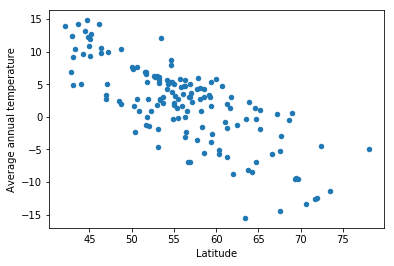

In [11]:
ax = data.plot(x="Lat",y="AvgAnnual",kind="Scatter")
ax.set_xlabel("Latitude")
ax.set_ylabel("Average annual temperature")

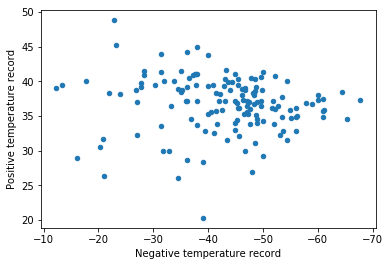

In [12]:
ax=data.plot(x="TempMin",y="AbsMax",kind="scatter")
ax.set_xlabel("Negative temperature record")
ax.set_ylabel("Positive temperature record")
ax.invert_xaxis()

In [13]:
data['spread'] = data['TempWarmest'] - data['TempColdest']
data.nlargest(3,'spread')

,City,Lat,Long,TempMin,TempColdest,AvgAnnual,TempWarmest,AbsMax,Precipitation,spread
23,Верхоянск,67.550593,133.399340,-67.8,-45.4,-14.5,16.5,37.3,178,61.9
83,Оймякон,63.464138,142.773727,-65.4,-46.4,-15.5,14.9,34.6,212,61.3
141,Якутск,62.035452,129.675475,-64.4,-38.6,-8.8,19.5,38.4,237,58.1


In [14]:
# Add distance to Moscow
msk_coords = tuple(data.loc[data["City"]=="Москва"][["Lat","Long"]].iloc[0])
data["DistMsk"] = data.apply(lambda row : geopy.distance.distance(msk_coords,(row["Lat"],row["Long"])).km,axis=1)
data.head()

,City,Lat,Long,TempMin,TempColdest,AvgAnnual,TempWarmest,AbsMax,Precipitation,spread,DistMsk
0,Абакан,53.717564,91.429317,-38.0,-17.5,3.0,25.0,45.0,323,42.5,3385.714976
1,Алдан,58.605723,125.396100,-48.7,-26.3,-5.5,16.6,35.2,718,42.9,4931.185884
2,Александров Гай,50.143771,48.549450,-39.9,-8.7,7.4,24.2,43.8,329,32.9,962.411007
3,Александровск-Сахалинский,50.907923,142.174636,-41.0,-16.3,0.9,16.6,32.6,679,32.9,6299.316439
4,Анадырь,64.733661,177.496826,-46.8,-22.6,-6.9,11.6,30.0,384,34.2,6212.824954


In [15]:
msk = data.loc[data['DistMsk']<300]
msk

,City,Lat,Long,TempMin,TempColdest,AvgAnnual,TempWarmest,AbsMax,Precipitation,spread,DistMsk
27,Владимир,56.144596,40.417869,-43.0,-8.7,4.7,18.0,37.1,584,26.7,180.220811
40,Елатьма,54.966215,41.751759,-42.9,-8.7,5.0,19.3,39.3,629,28.0,276.493278
43,Иваново,57.005067,40.976645,-49.8,-12.1,3.6,18.1,38.7,612,30.2,249.796304
71,Москва,55.755826,37.617300,-42.1,-6.7,5.8,19.2,38.2,707,25.9,0.000000
98,Рыбинск,58.057486,38.811697,-42.0,-8.8,4.4,18.8,37.2,660,27.6,266.427003
99,Рязань,54.609542,39.712586,-40.9,-7.9,5.4,19.2,39.5,575,27.1,184.648651
115,Тверь,56.858721,35.917597,-44.0,-7.6,5.1,18.8,38.8,653,26.4,161.697535
119,Тула,54.204836,37.618491,-36.1,-7.3,5.7,19.4,39.2,614,26.7,172.661102


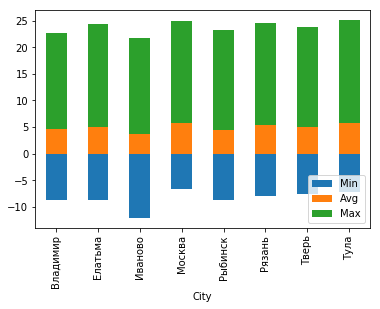

In [16]:
ax=msk.plot(x="City",y=["TempColdest","AvgAnnual","TempWarmest"],kind="bar",stacked="true")
ax.legend(["Min","Avg","Max"],loc='lower right')

In [17]:
from bokeh.io import output_file, output_notebook, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, LogColorMapper, BasicTicker, ColorBar,
    DataRange1d, PanTool, WheelZoomTool, BoxSelectTool, HoverTool
)
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5
from bokeh.plotting import gmap

In [18]:
google_key = "<INSERT YOUR KEY HERE>"
#https://developers.google.com/maps/documentation/javascript/get-api-key

In [19]:
data["PrecipSize"] = data["Precipitation"] / 50.0
map_options = GMapOptions(lat=msk_coords[0], lng=msk_coords[1], map_type="roadmap", zoom=4)

plot = gmap(google_key,map_options=map_options)

plot.title.text = "Rainfall in Russian cities"

source = ColumnDataSource(data=data)

my_hover = HoverTool()
my_hover.tooltips = [('City', '@City'),('Precipitation','@Precipitation')]

plot.circle(x="Long", y="Lat", size="PrecipSize", fill_color="blue", fill_alpha=0.5, source=source)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool(), my_hover)
output_notebook()

show(plot)

Loading BokehJS ...